In [1]:
from doepy import build
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# HUD Volume Estimation
## Inputs

In [2]:
inputs = {
    "FullHorizontalFOV" : 10,
    "FullVerticalFOV" : 4,
    "VirtualImageDistance" : 15000,
    "EyeboxToMirror1" : 1000,
    "EyeboxFullWidth" : 140,
    "EyeboxFullHeight" : 60,
    "Mirror1ObliquityAngle" : 30,
    "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
    "MechanicalVolumeIncrease" : 40,
    "M1M2OverlapFraction" : 0,
    "PGUVolumeEstimate" : 0.5
}

def ScaledDiffuserScreenWidth(inputs):
    ScalingFactor = inputs["FullHorizontalFOV"]/10
    return inputs["HUD_SCREEN_10x5_FOV_BASELINE_WIDTH"] * ScalingFactor

HUDDiffuserScreenImageWidth = ScaledDiffuserScreenWidth

## Calculations
### Mirror Size Calculations
#### Mirror 1 Horizontal Width Calculation

In [3]:
#### Mirror 1 Horizontal Width Calculation
##### Graphing
#RightFieldFieldPoint1XH = -inputs["VirtualImageDistance"]
#RightFieldFieldPoint1YH = np.tan(np.radians(inputs["FullHorizontalFOV"]/2))*inputs["VirtualImageDistance"]
#RightFieldWideSideEyebox1XH = 0
#RightFieldWideSideEyebox1YH = inputs["EyeboxFullWidth"]/2
#RightFieldFieldPoint2XH = RightFieldFieldPoint1XH
#RightFieldFieldPoint2YH = RightFieldFieldPoint1YH
#RightFieldWideSideEyebox2XH = 0
#RightFieldWideSideEyebox2YH = 0
#RightFieldFieldPoint3XH = RightFieldFieldPoint1XH
#RightFieldFieldPoint3YH = RightFieldFieldPoint1YH
#RightFieldWideSideEyebox3XH = 0
#RightFieldWideSideEyebox3YH = -RightFieldWideSideEyebox1YH

#CenterFieldFieldPoint1XH = -inputs["VirtualImageDistance"]
#CenterFieldFieldPoint1YH = 0 #=TAN(RADIANS(B1/2))*C3 where B1 and C3 are empty
#CenterFieldWideSideEyebox1XH = 0
#CenterFieldWideSideEyebox1YH = inputs["EyeboxFullWidth"]/2
#CenterFieldFieldPoint2XH = CenterFieldFieldPoint1XH
#CenterFieldFieldPoint2YH = CenterFieldFieldPoint1YH
#CenterFieldWideSideEyebox2XH = 0
#CenterFieldWideSideEyebox2YH = 0
#CenterFieldFieldPoint3XH = CenterFieldFieldPoint1XH
#CenterFieldFieldPoint3YH = CenterFieldFieldPoint1YH
#CenterFieldWideSideEyebox3XH = 0
#CenterFieldWideSideEyebox3YH = -CenterFieldWideSideEyebox1YH

#LeftFieldFieldPoint1XH = -inputs["VirtualImageDistance"]
#LeftFieldFieldPoint1YH = -RightFieldFieldPoint1YH
#LeftFieldWideSideEyebox1XH = 0
#LeftFieldWideSideEyebox1YH = inputs["EyeboxFullWidth"]/2
#LeftFieldFieldPoint2XH = LeftFieldFieldPoint1XH
#LeftFieldFieldPoint2YH = LeftFieldFieldPoint1YH
#LeftFieldWideSideEyebox2XH = 0
#LeftFieldWideSideEyebox2YH = 0
#LeftFieldFieldPoint3XH = LeftFieldFieldPoint1XH
#LeftFieldFieldPoint3YH = LeftFieldFieldPoint1YH
#LeftFieldWideSideEyebox3XH = 0
#LeftFieldWideSideEyebox3YH = -LeftFieldWideSideEyebox1YH

##### Virtual image	
#VirtualImageTopPointXH = RightField(inputs)["RightFieldFieldPoint1XH"]
#VirtualImageTopPointYH = RightField(inputs)["RightFieldFieldPoint1YH"]
#VirtualImageBottomPointXH = VirtualImageTopPointXH
#VirtualImageBottomPointYH = -VirtualImageTopPointYH

##### Mirror 1
#Mirror1TopPointXH = -inputs["EyeboxToMirror1"]
#Mirror1TopPointYH = RaySlopeH_m(inputs) * Mirror1TopPointXH + InterceptH(inputs)
#Mirror1BottomPointXH = Mirror1TopPointXH
#Mirror1BottomPointYH = -Mirror1TopPointYH

def RightField(inputs):
    points = {
        "RightFieldFieldPoint1XH" : -inputs["VirtualImageDistance"],
        "RightFieldFieldPoint1YH" : np.tan(np.radians(inputs["FullHorizontalFOV"]/2))*inputs["VirtualImageDistance"],
        "RightFieldWideSideEyebox1XH" : 0,
        "RightFieldWideSideEyebox1YH" : inputs["EyeboxFullWidth"]/2,
        "RightFieldFieldPoint2XH" : -inputs["VirtualImageDistance"],
        "RightFieldFieldPoint2YH" : np.tan(np.radians(inputs["FullHorizontalFOV"]/2))*inputs["VirtualImageDistance"],
        "RightFieldWideSideEyebox2XH" : 0,
        "RightFieldWideSideEyebox2YH" : 0,
        "RightFieldFieldPoint3XH" : -inputs["VirtualImageDistance"],
        "RightFieldFieldPoint3YH" : np.tan(np.radians(inputs["FullHorizontalFOV"]/2))*inputs["VirtualImageDistance"],
        "RightFieldWideSideEyebox3XH" : 0,
        "RightFieldWideSideEyebox3YH" : -inputs["EyeboxFullWidth"]/2
    }
    return points

def HorizontalCenterField(inputs):
    points = {
        "CenterFieldFieldPoint1XH" : -inputs["VirtualImageDistance"],
        "CenterFieldFieldPoint1YH" : 0, #=TAN(RADIANS(B1/2))*C3 where B1 and C3 are empty
        "CenterFieldWideSideEyebox1XH" : 0,
        "CenterFieldWideSideEyebox1YH" : inputs["EyeboxFullWidth"]/2,
        "CenterFieldFieldPoint2XH" : -inputs["VirtualImageDistance"],
        "CenterFieldFieldPoint2YH" : 0,
        "CenterFieldWideSideEyebox2XH" : 0,
        "CenterFieldWideSideEyebox2YH" : 0,
        "CenterFieldFieldPoint3XH" : -inputs["VirtualImageDistance"],
        "CenterFieldFieldPoint3YH" : 0,
        "CenterFieldWideSideEyebox3XH" : 0,
        "CenterFieldWideSideEyebox3YH" : -inputs["EyeboxFullWidth"]/2
    }
    return points

def LeftField(inputs):
    points = {
        "LeftFieldFieldPoint1XH" : -inputs["VirtualImageDistance"],
        "LeftFieldFieldPoint1YH" : -RightField(inputs)["RightFieldFieldPoint1YH"],
        "LeftFieldWideSideEyebox1XH" : 0,
        "LeftFieldWideSideEyebox1YH" : inputs["EyeboxFullWidth"]/2,
        "LeftFieldFieldPoint2XH" : -inputs["VirtualImageDistance"],
        "LeftFieldFieldPoint2YH" : -RightField(inputs)["RightFieldFieldPoint1YH"],
        "LeftFieldWideSideEyebox2XH" : 0,
        "LeftFieldWideSideEyebox2YH" : 0,
        "LeftFieldFieldPoint3XH" : -inputs["VirtualImageDistance"],
        "LeftFieldFieldPoint3YH" : -RightField(inputs)["RightFieldFieldPoint1YH"],
        "LeftFieldWideSideEyebox3XH" : 0,
        "LeftFieldWideSideEyebox3YH" : -inputs["EyeboxFullWidth"]/2
    }
    return points

def VirtualImageHorizontal(inputs):
    points = {
        "VirtualImageTopPointXH" : RightField(inputs)["RightFieldFieldPoint1XH"],
        "VirtualImageTopPointYH" : RightField(inputs)["RightFieldFieldPoint1YH"],
        "VirtualImageBottomPointXH" : RightField(inputs)["RightFieldFieldPoint1XH"],
        "VirtualImageBottomPointYH" : -RightField(inputs)["RightFieldFieldPoint1YH"]
    }
    return points

##### Mirror 1
def RaySlopeH_m(inputs):
    return (np.tan(np.radians(inputs["FullHorizontalFOV"]/2))*inputs["VirtualImageDistance"]-inputs["EyeboxFullWidth"]/2)/(-inputs["VirtualImageDistance"])
    
def InterceptH(inputs):
    return inputs["EyeboxFullWidth"]/2

def Mirror1Horizontal(inputs):
    points = {
        "Mirror1TopPointXH" : -inputs["EyeboxToMirror1"],
        "Mirror1TopPointYH" : RaySlopeH_m(inputs) * (-inputs["EyeboxToMirror1"]) + InterceptH(inputs),
        "Mirror1BottomPointXH" : -inputs["EyeboxToMirror1"],
        "Mirror1BottomPointYH" : -RaySlopeH_m(inputs) * (-inputs["EyeboxToMirror1"]) + InterceptH(inputs)
    }
    return points

<AxesSubplot:xlabel='x', ylabel='y'>

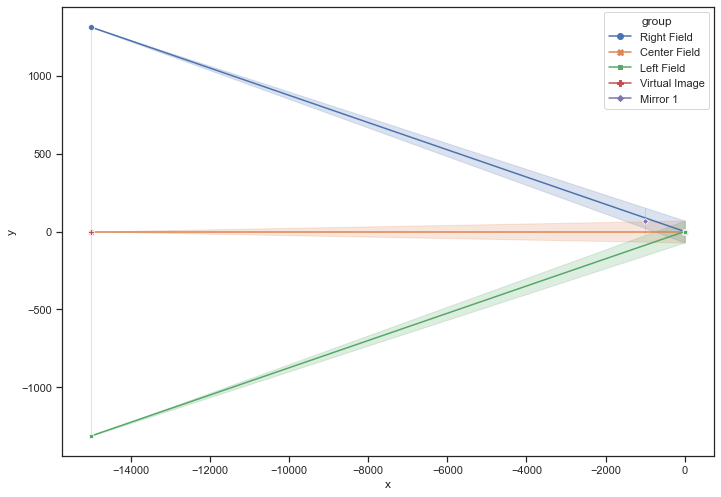

In [4]:
sns.set_theme(style="ticks")

dataHorizontal = [
    {'group': 'Right Field', 'x': RightField(inputs)["RightFieldFieldPoint1XH"], 'y': RightField(inputs)["RightFieldFieldPoint1YH"]},
    {'group': 'Right Field', 'x': RightField(inputs)["RightFieldWideSideEyebox1XH"], 'y': RightField(inputs)["RightFieldWideSideEyebox1YH"]},
    {'group': 'Right Field', 'x': RightField(inputs)["RightFieldFieldPoint2XH"], 'y': RightField(inputs)["RightFieldFieldPoint2YH"]},
    {'group': 'Right Field', 'x': RightField(inputs)["RightFieldWideSideEyebox2XH"], 'y': RightField(inputs)["RightFieldWideSideEyebox2YH"]},
    {'group': 'Right Field', 'x': RightField(inputs)["RightFieldFieldPoint3XH"], 'y': RightField(inputs)["RightFieldFieldPoint3YH"]},
    {'group': 'Right Field', 'x': RightField(inputs)["RightFieldWideSideEyebox3XH"], 'y': RightField(inputs)["RightFieldWideSideEyebox3YH"]},
    {'group': 'Center Field', 'x': HorizontalCenterField(inputs)["CenterFieldFieldPoint1XH"], 'y': HorizontalCenterField(inputs)["CenterFieldFieldPoint1YH"]},
    {'group': 'Center Field', 'x': HorizontalCenterField(inputs)["CenterFieldWideSideEyebox1XH"], 'y': HorizontalCenterField(inputs)["CenterFieldWideSideEyebox1YH"]},
    {'group': 'Center Field', 'x': HorizontalCenterField(inputs)["CenterFieldFieldPoint2XH"], 'y': HorizontalCenterField(inputs)["CenterFieldFieldPoint2YH"]},
    {'group': 'Center Field', 'x': HorizontalCenterField(inputs)["CenterFieldWideSideEyebox2XH"], 'y': HorizontalCenterField(inputs)["CenterFieldWideSideEyebox2YH"]},
    {'group': 'Center Field', 'x': HorizontalCenterField(inputs)["CenterFieldFieldPoint3XH"], 'y': HorizontalCenterField(inputs)["CenterFieldFieldPoint3YH"]},
    {'group': 'Center Field', 'x': HorizontalCenterField(inputs)["CenterFieldWideSideEyebox3XH"], 'y': HorizontalCenterField(inputs)["CenterFieldWideSideEyebox3YH"]},
    {'group': 'Left Field', 'x': LeftField(inputs)["LeftFieldFieldPoint1XH"], 'y': LeftField(inputs)["LeftFieldFieldPoint1YH"]},
    {'group': 'Left Field', 'x': LeftField(inputs)["LeftFieldWideSideEyebox1XH"], 'y': LeftField(inputs)["LeftFieldWideSideEyebox1YH"]},
    {'group': 'Left Field', 'x': LeftField(inputs)["LeftFieldFieldPoint2XH"], 'y': LeftField(inputs)["LeftFieldFieldPoint2YH"]},
    {'group': 'Left Field', 'x': LeftField(inputs)["LeftFieldWideSideEyebox2XH"], 'y': LeftField(inputs)["LeftFieldWideSideEyebox2YH"]},
    {'group': 'Left Field', 'x': LeftField(inputs)["LeftFieldFieldPoint3XH"], 'y': LeftField(inputs)["LeftFieldFieldPoint3YH"]},
    {'group': 'Left Field', 'x': LeftField(inputs)["LeftFieldWideSideEyebox3XH"], 'y': LeftField(inputs)["LeftFieldWideSideEyebox3YH"]},
    {'group': 'Virtual Image', 'x': VirtualImageHorizontal(inputs)["VirtualImageTopPointXH"], 'y': VirtualImageHorizontal(inputs)["VirtualImageTopPointYH"]},
    {'group': 'Virtual Image', 'x': VirtualImageHorizontal(inputs)["VirtualImageBottomPointXH"], 'y': VirtualImageHorizontal(inputs)["VirtualImageBottomPointYH"]},
    {'group': 'Mirror 1', 'x': Mirror1Horizontal(inputs)["Mirror1TopPointXH"], 'y': Mirror1Horizontal(inputs)["Mirror1TopPointYH"]},
    {'group': 'Mirror 1', 'x': Mirror1Horizontal(inputs)["Mirror1BottomPointXH"], 'y': Mirror1Horizontal(inputs)["Mirror1BottomPointYH"]}
    ]
dfHorizontal = pd.DataFrame.from_records(dataHorizontal)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(
    data=dfHorizontal,
    x="x", y="y", hue="group", style="group",
    markers=True, dashes=False
)

#### Mirror 1 Vertical Width Calculation

In [5]:
#### Mirror 1 Vertical Width Calculation
##### Graphing
#TopFieldFieldPoint1XV = -inputs["VirtualImageDistance"]
#TopFieldFieldPoint1YV = np.tan(np.radians(inputs["FullVerticalFOV"]/2))*inputs["VirtualImageDistance"]
#TopFieldWideSideEyebox1XV = 0
#TopFieldWideSideEyebox1YV = inputs["EyeboxFullHeight"]/2
#TopFieldFieldPoint2XV = TopFieldFieldPoint1XV
#TopFieldFieldPoint2YV = TopFieldFieldPoint1YV
#TopFieldWideSideEyebox2XV = 0
#TopFieldWideSideEyebox2YV = 0
#TopFieldFieldPoint3XV = TopFieldFieldPoint1XV
#TopFieldFieldPoint3YV = TopFieldFieldPoint1YV
#TopFieldWideSideEyebox3XV = 0
#TopFieldWideSideEyebox3YV = -TopFieldWideSideEyebox1YV
#
#CenterFieldFieldPoint1XV = -inputs["VirtualImageDistance"]
#CenterFieldFieldPoint1YV = 0 #=TAN(RADIANS(B43/2))*C45 where B43 and C45 are empty
#CenterFieldWideSideEyebox1XV = 0
#CenterFieldWideSideEyebox1YV = inputs["EyeboxFullHeight"]/2
#CenterFieldFieldPoint2XV = CenterFieldFieldPoint1XV
#CenterFieldFieldPoint2YV = CenterFieldFieldPoint1YV
#CenterFieldWideSideEyebox2XV = 0
#CenterFieldWideSideEyebox2YV = 0
#CenterFieldFieldPoint3XV = CenterFieldFieldPoint1XV
#CenterFieldFieldPoint3YV = CenterFieldFieldPoint1YV
#CenterFieldWideSideEyebox3XV = 0
#CenterFieldWideSideEyebox3YV = -CenterFieldWideSideEyebox1YV
#
#BottomFieldFieldPoint1XV = -inputs["VirtualImageDistance"]
#BottomFieldFieldPoint1YV = -TopFieldFieldPoint1YV
#BottomFieldWideSideEyebox1XV = 0
#BottomFieldWideSideEyebox1YV = TopFieldWideSideEyebox1YV
#BottomFieldFieldPoint2XV = BottomFieldFieldPoint1XV
#BottomFieldFieldPoint2YV = BottomFieldFieldPoint1YV
#BottomFieldWideSideEyebox2XV = 0
#BottomFieldWideSideEyebox2YV = 0
#BottomFieldFieldPoint3XV = BottomFieldFieldPoint1XV
#BottomFieldFieldPoint3YV = BottomFieldFieldPoint1YV
#BottomFieldWideSideEyebox3XV = 0
#BottomFieldWideSideEyebox3YV = -BottomFieldWideSideEyebox1YV

##### Virtual image	
#VirtualImageTopPointXV = TopFieldFieldPoint1XV
#VirtualImageTopPointYV = TopFieldFieldPoint1YV
#VirtualImageBottomPointXV = VirtualImageTopPointXV
#VirtualImageBottomPointYV = -VirtualImageTopPointYV

##### Mirror 1
#Mirror1TopPointXV = -inputs["EyeboxToMirror1"]
#Mirror1TopPointYV = RaySlopeV_m(inputs) * Mirror1TopPointXV + InterceptV(inputs)
#Mirror1BottomPointXV = Mirror1TopPointXV
#Mirror1BottomPointYV = -Mirror1TopPointYV

def TopField(inputs):
    points = {
        "TopFieldFieldPoint1XV" : -inputs["VirtualImageDistance"],
        "TopFieldFieldPoint1YV" : np.tan(np.radians(inputs["FullVerticalFOV"]/2))*inputs["VirtualImageDistance"],
        "TopFieldWideSideEyebox1XV" : 0,
        "TopFieldWideSideEyebox1YV" : inputs["EyeboxFullHeight"]/2,
        "TopFieldFieldPoint2XV" : -inputs["VirtualImageDistance"],
        "TopFieldFieldPoint2YV" : np.tan(np.radians(inputs["FullVerticalFOV"]/2))*inputs["VirtualImageDistance"],
        "TopFieldWideSideEyebox2XV" : 0,
        "TopFieldWideSideEyebox2YV" : 0,
        "TopFieldFieldPoint3XV" : -inputs["VirtualImageDistance"],
        "TopFieldFieldPoint3YV" : np.tan(np.radians(inputs["FullVerticalFOV"]/2))*inputs["VirtualImageDistance"],
        "TopFieldWideSideEyebox3XV" : 0,
        "TopFieldWideSideEyebox3YV" : -inputs["EyeboxFullHeight"]/2
    }
    return points

def VerticalCenterField(inputs):
    points = {
        "CenterFieldFieldPoint1XV" : -inputs["VirtualImageDistance"],
        "CenterFieldFieldPoint1YV" : 0, #=TAN(RADIANS(B43/2))*C45 where B43 and C45 are empty
        "CenterFieldWideSideEyebox1XV" : 0,
        "CenterFieldWideSideEyebox1YV" : inputs["EyeboxFullHeight"]/2,
        "CenterFieldFieldPoint2XV" : -inputs["VirtualImageDistance"],
        "CenterFieldFieldPoint2YV" : 0,
        "CenterFieldWideSideEyebox2XV" : 0,
        "CenterFieldWideSideEyebox2YV" : 0,
        "CenterFieldFieldPoint3XV" : -inputs["VirtualImageDistance"],
        "CenterFieldFieldPoint3YV" : 0,
        "CenterFieldWideSideEyebox3XV" : 0,
        "CenterFieldWideSideEyebox3YV" : -inputs["EyeboxFullHeight"]/2
    }
    return points

def BottomField(inputs):
    points = {
        "BottomFieldFieldPoint1XV" : -inputs["VirtualImageDistance"],
        "BottomFieldFieldPoint1YV" : -TopField(inputs)["TopFieldFieldPoint1YV"],
        "BottomFieldWideSideEyebox1XV" : 0,
        "BottomFieldWideSideEyebox1YV" : TopField(inputs)["TopFieldWideSideEyebox1YV"],
        "BottomFieldFieldPoint2XV" : -inputs["VirtualImageDistance"],
        "BottomFieldFieldPoint2YV" : -TopField(inputs)["TopFieldFieldPoint1YV"],
        "BottomFieldWideSideEyebox2XV" : 0,
        "BottomFieldWideSideEyebox2YV" : 0,
        "BottomFieldFieldPoint3XV" : -inputs["VirtualImageDistance"],
        "BottomFieldFieldPoint3YV" : -TopField(inputs)["TopFieldFieldPoint1YV"],
        "BottomFieldWideSideEyebox3XV" : 0,
        "BottomFieldWideSideEyebox3YV" : -TopField(inputs)["TopFieldWideSideEyebox1YV"]
    }
    return points


def VirtualImageVertical(inputs):
    points = {
        "VirtualImageTopPointXV" : TopField(inputs)["TopFieldFieldPoint1XV"],
        "VirtualImageTopPointYV" : TopField(inputs)["TopFieldFieldPoint1YV"],
        "VirtualImageBottomPointXV" : TopField(inputs)["TopFieldFieldPoint1XV"],
        "VirtualImageBottomPointYV" : -TopField(inputs)["TopFieldFieldPoint1YV"]
    }
    return points

##### Mirror 1
def RaySlopeV_m(inputs):
    return (np.tan(np.radians(inputs["FullVerticalFOV"]/2))*inputs["VirtualImageDistance"]-inputs["EyeboxFullHeight"]/2)/(-inputs["VirtualImageDistance"])

def InterceptV(inputs):
    return inputs["EyeboxFullHeight"]/2

def Mirror1Vertical(inputs):
    points = {
        "Mirror1TopPointXV" : -inputs["EyeboxToMirror1"],
        "Mirror1TopPointYV" : RaySlopeV_m(inputs) * (-inputs["EyeboxToMirror1"]) + InterceptV(inputs),
        "Mirror1BottomPointXV" : -inputs["EyeboxToMirror1"],
        "Mirror1BottomPointYV" : -RaySlopeV_m(inputs) * (-inputs["EyeboxToMirror1"]) + InterceptV(inputs)
    }
    return points

<AxesSubplot:xlabel='x', ylabel='y'>

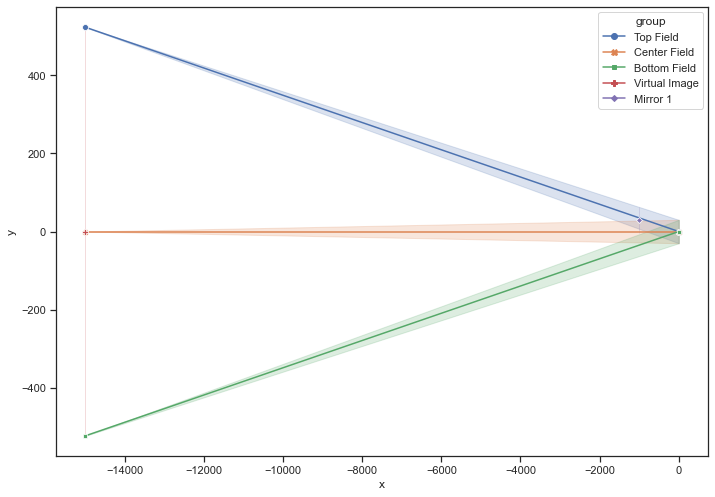

In [6]:
sns.set_theme(style="ticks")

dataVertical = [
    {'group': 'Top Field', 'x': TopField(inputs)["TopFieldFieldPoint1XV"], 'y': TopField(inputs)["TopFieldFieldPoint1YV"]},
    {'group': 'Top Field', 'x': TopField(inputs)["TopFieldWideSideEyebox1XV"], 'y': TopField(inputs)["TopFieldWideSideEyebox1YV"]},
    {'group': 'Top Field', 'x': TopField(inputs)["TopFieldFieldPoint2XV"], 'y': TopField(inputs)["TopFieldFieldPoint2YV"]},
    {'group': 'Top Field', 'x': TopField(inputs)["TopFieldWideSideEyebox2XV"], 'y': TopField(inputs)["TopFieldWideSideEyebox2YV"]},
    {'group': 'Top Field', 'x': TopField(inputs)["TopFieldFieldPoint3XV"], 'y': TopField(inputs)["TopFieldFieldPoint3YV"]},
    {'group': 'Top Field', 'x': TopField(inputs)["TopFieldWideSideEyebox3XV"], 'y': TopField(inputs)["TopFieldWideSideEyebox3YV"]},
    {'group': 'Center Field', 'x': VerticalCenterField(inputs)["CenterFieldFieldPoint1XV"], 'y': VerticalCenterField(inputs)["CenterFieldFieldPoint1YV"]},
    {'group': 'Center Field', 'x': VerticalCenterField(inputs)["CenterFieldWideSideEyebox1XV"], 'y': VerticalCenterField(inputs)["CenterFieldWideSideEyebox1YV"]},
    {'group': 'Center Field', 'x': VerticalCenterField(inputs)["CenterFieldFieldPoint2XV"], 'y': VerticalCenterField(inputs)["CenterFieldFieldPoint2YV"]},
    {'group': 'Center Field', 'x': VerticalCenterField(inputs)["CenterFieldWideSideEyebox2XV"], 'y': VerticalCenterField(inputs)["CenterFieldWideSideEyebox2YV"]},
    {'group': 'Center Field', 'x': VerticalCenterField(inputs)["CenterFieldFieldPoint3XV"], 'y': VerticalCenterField(inputs)["CenterFieldFieldPoint3YV"]},
    {'group': 'Center Field', 'x': VerticalCenterField(inputs)["CenterFieldWideSideEyebox3XV"], 'y': VerticalCenterField(inputs)["CenterFieldWideSideEyebox3YV"]},
    {'group': 'Bottom Field', 'x': BottomField(inputs)["BottomFieldFieldPoint1XV"], 'y': BottomField(inputs)["BottomFieldFieldPoint1YV"]},
    {'group': 'Bottom Field', 'x': BottomField(inputs)["BottomFieldWideSideEyebox1XV"], 'y': BottomField(inputs)["BottomFieldWideSideEyebox1YV"]},
    {'group': 'Bottom Field', 'x': BottomField(inputs)["BottomFieldFieldPoint2XV"], 'y': BottomField(inputs)["BottomFieldFieldPoint2YV"]},
    {'group': 'Bottom Field', 'x': BottomField(inputs)["BottomFieldWideSideEyebox2XV"], 'y': BottomField(inputs)["BottomFieldWideSideEyebox2YV"]},
    {'group': 'Bottom Field', 'x': BottomField(inputs)["BottomFieldFieldPoint3XV"], 'y': BottomField(inputs)["BottomFieldFieldPoint3YV"]},
    {'group': 'Bottom Field', 'x': BottomField(inputs)["BottomFieldWideSideEyebox3XV"], 'y': BottomField(inputs)["BottomFieldWideSideEyebox3YV"]},
    {'group': 'Virtual Image', 'x': VirtualImageVertical(inputs)["VirtualImageTopPointXV"], 'y': VirtualImageVertical(inputs)["VirtualImageTopPointYV"]},
    {'group': 'Virtual Image', 'x': VirtualImageVertical(inputs)["VirtualImageBottomPointXV"], 'y': VirtualImageVertical(inputs)["VirtualImageBottomPointYV"]},
    {'group': 'Mirror 1', 'x': Mirror1Vertical(inputs)["Mirror1TopPointXV"], 'y': Mirror1Vertical(inputs)["Mirror1TopPointYV"]},
    {'group': 'Mirror 1', 'x': Mirror1Vertical(inputs)["Mirror1BottomPointXV"], 'y': Mirror1Vertical(inputs)["Mirror1BottomPointYV"]}
    ]
dfVertical = pd.DataFrame.from_records(dataVertical)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(
    data=dfVertical,
    x="x", y="y", hue="group", style="group",
    markers=True, dashes=False
)

In [7]:
def MirrorFullHeight(inputs):
    #TiltAngleOfM1 = Mirror1ObliquityAngle #degrees
    TopPointX    = ( -InterceptV(inputs) * np.tan(np.radians(inputs["Mirror1ObliquityAngle"])) - inputs["EyeboxToMirror1"]) / (1+np.tan(np.radians(inputs["Mirror1ObliquityAngle"])) * RaySlopeV_m(inputs))
    BottomPointX = (  InterceptV(inputs) * np.tan(np.radians(inputs["Mirror1ObliquityAngle"])) - inputs["EyeboxToMirror1"]) / (1-np.tan(np.radians(inputs["Mirror1ObliquityAngle"])) * RaySlopeV_m(inputs))

    TopPointY    = (  RaySlopeV_m(inputs) * TopPointX    ) + InterceptV(inputs)
    BottomPointY = ( -RaySlopeV_m(inputs) * BottomPointX ) - InterceptV(inputs)

    return np.sqrt(np.power(TopPointX-BottomPointX,2)+np.power(TopPointY-BottomPointY,2))

#### M1 focal length calculation

In [8]:
####M1 focal length calculation	

def M1ToVirtualImage(inputs):
    return inputs["VirtualImageDistance"]-inputs["EyeboxToMirror1"] #(s2) mm

def SceenToM1(inputs):
    ## Screen and Image Calculations		
    VirtualImageWidth = np.tan(np.radians(inputs["FullHorizontalFOV"]/2))*inputs["VirtualImageDistance"]*2 #mm
    HUDImageMagnification = VirtualImageWidth/HUDDiffuserScreenImageWidth(inputs)	#x
    return M1ToVirtualImage(inputs)/HUDImageMagnification #mm

# KEEP!
# Not used in volume estimation
#ScreenSize = HUDDiffuserScreenImageWidth #mm
#OpticalPowerOfM1 = (1/SceenToM1(inputs))-(1/M1ToVirtualImage(inputs)) #1/f = 1/s1+1/s2 (note s2 is negative since it’s a virtual image)
#FocalLengthOfM1 = 1/OpticalPowerOfM1 #(f) mm

### HUD Volume Calculation

In [9]:
def VolumeBetweenScreenAndM1Liters(inputs):
    ## Primary mirror size estimate
    Mirror1HorizontalDiameterEstimate = Mirror1Horizontal(inputs)["Mirror1TopPointYH"]*2 #mm
    Mirror1VerticalDiameterEstimate = MirrorFullHeight(inputs) #mm

    Mirror1Width = Mirror1HorizontalDiameterEstimate #mm
    Mirror1Height = Mirror1VerticalDiameterEstimate #mm
    Mirror1Area = Mirror1Width*Mirror1Height #mm^2
            
    ScreenToM1 = SceenToM1(inputs) #mm
    ScreenWidth = HUDDiffuserScreenImageWidth(inputs) #mm
    ScreenHeight = (inputs["FullVerticalFOV"]/inputs["FullHorizontalFOV"])*HUDDiffuserScreenImageWidth(inputs) #mm
            
    # Find height of pyramid from base		
    HalfDiagonalM1 = 0.5*(np.sqrt(np.power(Mirror1Width,2)+np.power(Mirror1Height,2))) #Y2
    HalfDiagonalScreen = 0.5*(np.sqrt(np.power(ScreenWidth,2)+np.power(ScreenHeight,2))) #Y1
    Slope = (HalfDiagonalScreen-HalfDiagonalM1)/ScreenToM1 #(m)
    #x=0, y=0, so b=0		
    X2 = HalfDiagonalM1/Slope
    X1 = HalfDiagonalScreen/Slope
    ApexFromMirror1 = np.absolute(X2)
    ApexFromScreen = np.absolute(X1)

    # Find Mirror to screen volume
    AreaPyramidFromMirror = (1/3)*Mirror1Width*Mirror1Height*ApexFromMirror1 #mm^3
    AreaPyramidFromScreen = (1/3)*ScreenWidth*ScreenHeight*ApexFromScreen #mm^3
    VolumeBetweenScreenAndM1 = AreaPyramidFromMirror-AreaPyramidFromScreen #mm^3

    return 0.000001*VolumeBetweenScreenAndM1

## Outputs
### HUD Volume Estimate

In [10]:
def TotalMechanicalVolumeOfHUD(inputs):
    ## Primary mirror size estimate
    Mirror1HorizontalDiameterEstimate = Mirror1Horizontal(inputs)["Mirror1TopPointYH"]*2 #mm
    Mirror1VerticalDiameterEstimate = MirrorFullHeight(inputs) #mm

    VolumeFromHUDmirrors = VolumeBetweenScreenAndM1Liters(inputs)*(1-inputs["M1M2OverlapFraction"]/100) #Liters
    #print("Volume from HUD mirrors: {:.2f} liters".format(VolumeFromHUDmirrors))
    VolumeFromMirrorsAndPGU = VolumeFromHUDmirrors+inputs["PGUVolumeEstimate"] #Liters
    #print("Volume from mirrors + PGU: {:.2f} liters".format(VolumeFromMirrorsAndPGU))
    total = VolumeFromMirrorsAndPGU*(1+inputs["MechanicalVolumeIncrease"]/100)
    #print("Total Mechanical Volume of HUD: {:.2f} liters".format(total))
    return total

TotalMechanicalVolumeOfHUD(inputs)

10.562354834597118

In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [12]:
#interact(TotalMechanicalVolumeOfHUD);

# DOE

| Component | Distance of projected image (m) | FoV Horizontal (deg) | FoV Vertical (deg) |
| --- | :---: | :---: | :---:  |
| Current HUD | 2-4 | 7 | 3 |
| AR HUD | 2-20 | 10 | 5 |

In [13]:
## Nominal values
#FullHorizontalFOV = 10 #degrees
#FullVerticalFOV = 4 #degrees
#VirtualImageDistance = 15000 #mm
#EyeboxToMirror1 = 1000 #mm
#EyeboxFullWidth = 140 #mm
#EyeboxFullHeight = 60 #mm
#Mirror1ObliquityAngle = 30 #degrees

factors_ar = {
    'FullHorizontalFOV':[5,67],
    'FullVerticalFOV':[2,20],
    'VirtualImageDistance':[10000,30000],
    'EyeboxToMirror1':[500,1500],
    'EyeboxFullWidth':[70,210],
    'EyeboxFullHeight':[30,90],
    'Mirror1ObliquityAngle':[15,45]
    }

num_samples=1000

lhs = build.space_filling_lhs(factors_ar, num_samples=num_samples)

In [14]:
for index, row in lhs.iterrows():
    inputs = {
        "FullHorizontalFOV" : row['FullHorizontalFOV'],
        "FullVerticalFOV" : row['FullVerticalFOV'],
        "VirtualImageDistance" : row['VirtualImageDistance'],
        "EyeboxToMirror1" : row['EyeboxToMirror1'],
        "EyeboxFullWidth" : row['EyeboxFullWidth'],
        "EyeboxFullHeight" : row['EyeboxFullHeight'],
        "Mirror1ObliquityAngle" : row['Mirror1ObliquityAngle'],
        "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
        "MechanicalVolumeIncrease" : 20,
        "M1M2OverlapFraction" : 0,
        "PGUVolumeEstimate" : 0.5
    }

    mirrorSize = MirrorFullHeight(inputs)
    volume = TotalMechanicalVolumeOfHUD(inputs)
    lhs.at[index,'mirrorSize'] = mirrorSize
    lhs.at[index,'volume'] = volume
lhs

FullHorizontalFOV  FullVerticalFOV  VirtualImageDistance  \
0            14.061061         2.576577          19629.629630   
1            17.598599         5.729730          11601.601602   
2            32.431431        19.909910          19449.449449   
3            43.292292        15.405405          28218.218218   
4            21.508509         5.369369          19209.209209   
..                 ...              ...                   ...   
995          41.740741        10.450450          23873.873874   
996           7.296296        15.423423          24954.954955   
997          47.078078        19.423423          11861.861862   
998          40.065065         2.306306          24834.834835   
999          55.270270         7.171171          29479.479479   

     EyeboxToMirror1  EyeboxFullWidth  EyeboxFullHeight  \
0         960.460460       204.674675         72.222222   
1        1170.670671       179.589590         43.213213   
2         640.140140       100.690691         65.735736   
3         746.246246       176.646647         65.075075   
4        1223.723724       145.255255         62.432432   
..               ...              ...               ...   
995       812.312312       134.324324         39.489489   
996      1021.521522        84.294294         85.915916   
997       764.264264       141.471471         43.273273   
998      1270.770771        98.588589         47.237237   
999       818.318318       131.521522         86.396396   

     Mirror1ObliquityAngle  mirrorSize     volume  
0                36.741742  139.658548  12.263427  
1                23.438438  170.126125  17.059713  
2                18.423423  304.878203  37.505069  
3                23.648649  290.534850  51.875629  
4                18.753754  182.973358  21.998861  
..                     ...         ...        ...  
995              19.384384  198.141546  34.539112  
996              40.045045  475.018934  20.351730  
997              39.024024  396.303326  71.003527  
998              15.690691   99.696864  20.801675  
999              38.093093  237.587410  53.526738  

[1000 rows x 9 columns]

In [15]:
lhs.to_excel("hud-doe.xlsx", sheet_name='samples_1000')

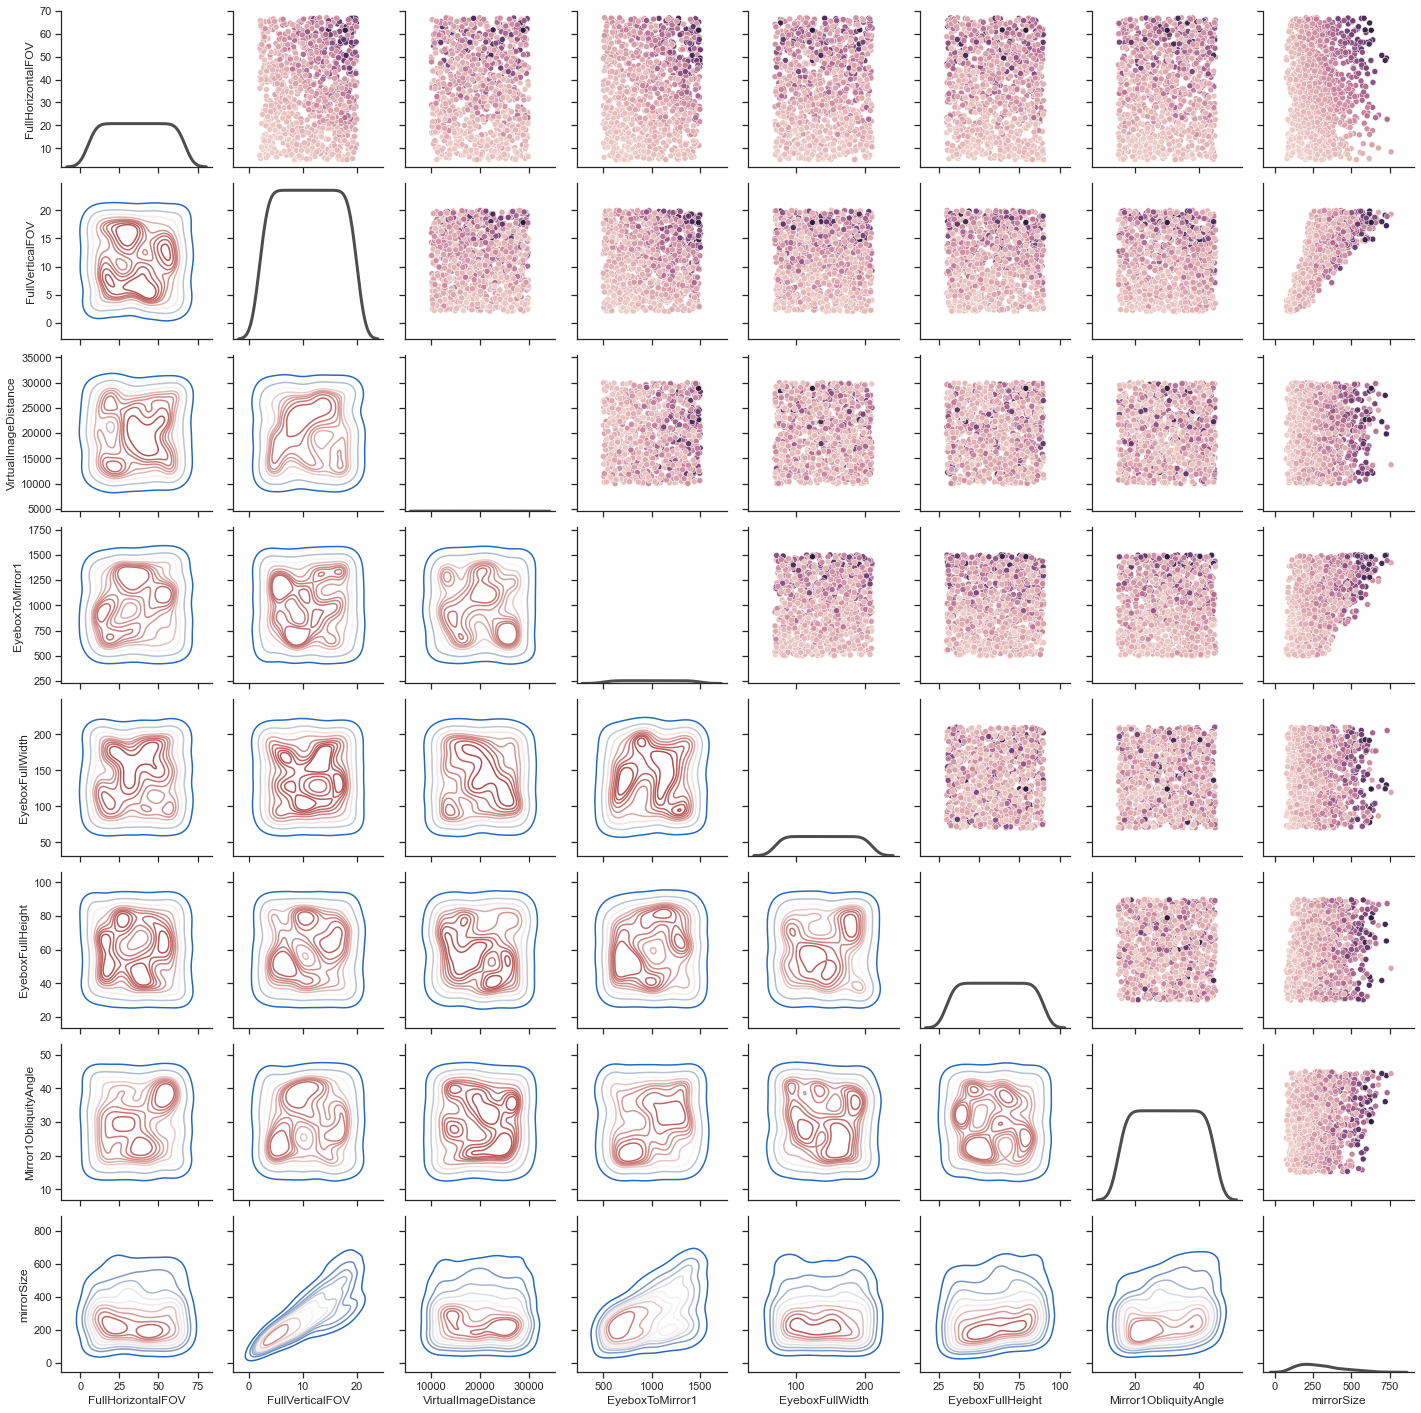

In [16]:
g = sns.PairGrid(lhs, hue='volume')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, hue=None, cmap='vlag')
g.map_diag(sns.kdeplot, lw=3, legend=False, hue=None, color=".3")

<AxesSubplot:xlabel='volume', ylabel='Count'>

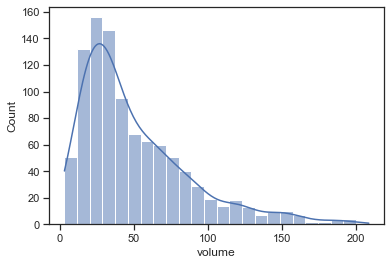

In [17]:
# Histogram
sns.histplot(data=lhs, x="volume", kde=True)

<AxesSubplot:ylabel='volume'>

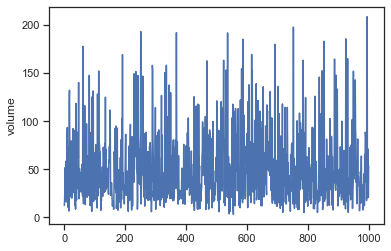

In [18]:
# Run-Sequence Plot
sns.lineplot(x=lhs.index, y="volume", data=lhs)

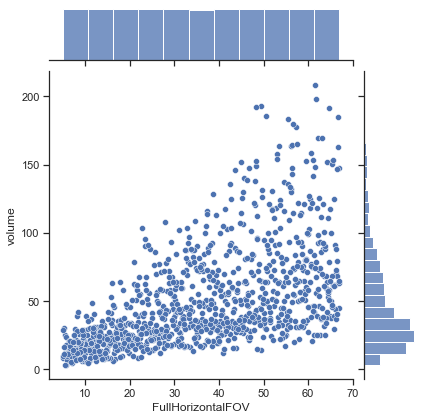

In [19]:
# Show the joint distribution
jointPlotFullHorizontalFOV = sns.jointplot(
    data=lhs,
    x="FullHorizontalFOV", y="volume"
)

In [20]:
import plotly.graph_objects as go

import numpy as np

t = lhs['volume']
x = lhs['FullHorizontalFOV']
y = lhs['FullVerticalFOV']

fig = go.Figure()
fig.add_trace(go.Histogram2dContour(
        x = x,
        y = y,
        colorscale = 'Blues',
        reversescale = True,
        xaxis = 'x',
        yaxis = 'y'
    ))
fig.add_trace(go.Scatter(
        x = x,
        y = y,
        xaxis = 'x',
        yaxis = 'y',
        mode = 'markers',
        marker = dict(
            color = 'rgba(0,0,0,0.3)',
            size = 3
        )
    ))
fig.add_trace(go.Histogram(
        y = y,
        xaxis = 'x2',
        marker = dict(
            color = 'rgba(0,0,0,1)'
        )
    ))
fig.add_trace(go.Histogram(
        x = x,
        yaxis = 'y2',
        marker = dict(
            color = 'rgba(0,0,0,1)'
        )
    ))

fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    yaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    xaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    height = 600,
    width = 600,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)

fig.show()

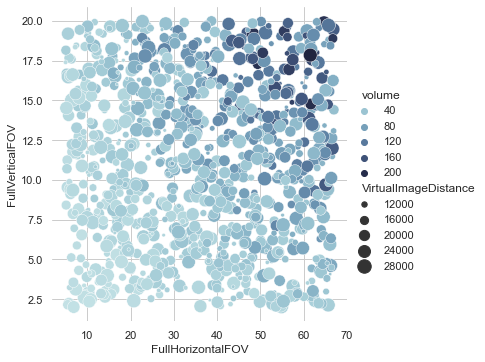

In [21]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
j = sns.relplot(
    data=lhs,
    x="FullHorizontalFOV", y="FullVerticalFOV",
    hue="volume", size="VirtualImageDistance",
    palette=cmap, sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
j.ax.xaxis.grid(True, "minor", linewidth=.25)
j.ax.yaxis.grid(True, "minor", linewidth=.25)
j.despine(left=True, bottom=True)

In [22]:
import plotly.express as px
df = lhs
fig = px.parallel_coordinates(df, color="volume", labels={"FullHorizontalFOV": "Full Horizontal FOV",
                "FullVerticalFOV": "Full Vertical FOV", "VirtualImageDistance": "Virtual Image Distance",
                "EyeboxToMirror1": "Eyebox To Mirror 1", "EyeboxFullWidth": "Eyebox Full Width", "EyeboxFullHeight": "Eyebox Full Height", "Mirror1ObliquityAngle": "Mirror 1 Obliquity Angle", "mirrorSize":"mirrorSize"},
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [23]:
import plotly.graph_objects as go

import pandas as pd

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# Create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Heatmap(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=100, b=0, l=0, r=0),
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdowns
button_layer_1_height = 1.08
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["colorscale", "Viridis"],
                    label="Viridis",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Cividis"],
                    label="Cividis",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Blues"],
                    label="Blues",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Greens"],
                    label="Greens",
                    method="restyle"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
        dict(
            buttons=list([
                dict(
                    args=["reversescale", False],
                    label="False",
                    method="restyle"
                ),
                dict(
                    args=["reversescale", True],
                    label="True",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.37,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
        dict(
            buttons=list([
                dict(
                    args=[{"contours.showlines": False, "type": "contour"}],
                    label="Hide lines",
                    method="restyle"
                ),
                dict(
                    args=[{"contours.showlines": True, "type": "contour"}],
                    label="Show lines",
                    method="restyle"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.58,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
    ]
)

fig.update_layout(
    annotations=[
        dict(text="colorscale", x=0, xref="paper", y=1.06, yref="paper",
                             align="left", showarrow=False),
        dict(text="Reverse<br>Colorscale", x=0.25, xref="paper", y=1.07,
                             yref="paper", showarrow=False),
        dict(text="Lines", x=0.54, xref="paper", y=1.06, yref="paper",
                             showarrow=False)
    ])

fig.show()

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}]])

# Generate data
x = np.linspace(-5, 80, 10)
y = np.linspace(-5, 60, 10)
xGrid, yGrid = np.meshgrid(y, x)
z = xGrid ** 3 + yGrid ** 3

# adding surfaces to subplots.
fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='Viridis', showscale=False),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='RdBu', showscale=False),
    row=1, col=2)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='YlOrRd', showscale=False),
    row=2, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='YlGnBu', showscale=False),
    row=2, col=2)

fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=800,
    width=800
)

fig.show()

In [25]:
eng_characteristics_platform = []
eng_characteristics_technology = []

variables = []

class Component():
    type = "HUD"

class Factor():
    name = ""
    description = ""
    nominal = None
    min = None
    max = None
